# Project: Investigate a Dataset (Appointment Show up in Brazil)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The goal of this project is to analyse data related to medical appointments made by people leaving in Brazil. This project focuses on using variables or features of patients to predict whether or not patients will show up for their scheduled appointment. The given data has 110527 entries and 14 features. I would first of all access and explore the data before cleaning the data since understanding the data helps to know what questions to ask or which questions needs to be address. Some of the questions to consider for this prediction are\
> Which gender shows up more and does gender influence or affect show up fro medical appointment?\
> Does scholarship influence or affect show up?\
> Which age class shows up more and does the age affect the show up?\
> Does people who receive sms message show up?\
> Does the neighborhood a patient live in affect show up? \
> Does the day of the week the appointment was made influence show up?\
> Does gender and age class affect show up?


In [71]:
#importing important libraries for my data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling
Access, explore and clean data by dropping irrelevant columns, remove duplicates and change datatype of AppointmentDay column. 

In [91]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#   types and look for instances of missing or possibly errant data.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [92]:
#Check the data types of my features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [93]:
#renaming the No-Show column to make it convenient for access
df=df.rename(columns={'No-show':'No_show'})

In [94]:
#Remove the time included in the date since it was the same and redundant
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay']).dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [95]:
#Using pd.to_datetime to convert the date from object to datetime data type
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  object        
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No_show         110527 non-null  object        
dtypes: datetime64[ns](1), float64(1), in

In [96]:
#Determining the number of people in the data and number of info about each person
df.shape


(110527, 14)

In [97]:
#Checking for missing values since they affect the result
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
dtype: int64

In [98]:
#Determing the number of unique variables of each feature in the dataframe. 
#Helps to know which features are important to my analysis
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No_show                2
dtype: int64

In [99]:
#Deleting column that are not useful for my analysis
df.drop(columns=['PatientId', 'AppointmentID','ScheduledDay'], axis=1, inplace= True)


In [100]:
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [101]:
#Check to see how many row are duplicated
df.duplicated().sum()
#len(df)-len(df.drop_duplicates())

15375

In [102]:
#Drop all the duplicates since it is redundunt
df=df.drop_duplicates()

In [103]:
#Checking to see if duplicated have been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95152 entries, 0 to 110525
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          95152 non-null  object        
 1   AppointmentDay  95152 non-null  datetime64[ns]
 2   Age             95152 non-null  int64         
 3   Neighbourhood   95152 non-null  object        
 4   Scholarship     95152 non-null  int64         
 5   Hipertension    95152 non-null  int64         
 6   Diabetes        95152 non-null  int64         
 7   Alcoholism      95152 non-null  int64         
 8   Handcap         95152 non-null  int64         
 9   SMS_received    95152 non-null  int64         
 10  No_show         95152 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 8.7+ MB


In [104]:
#Get Statistics description of the data
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,95152.000000,95152.000000,95152.000000,95152.000000,95152.000000,95152.000000,95152.000000
mean,37.949723,0.105936,0.215119,0.079410,0.030677,0.024098,0.344197
std,23.058085,0.307757,0.410907,0.270379,0.172443,0.167944,0.475108
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [105]:
#Delete rows with age = -1 since a person cannot be -1 years old
df = df[df.Age != -1]

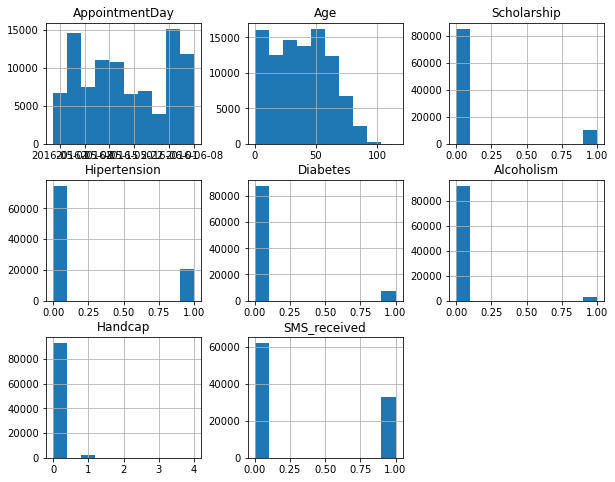

In [106]:
#df.info()
#Histogram figure of the data features
df.hist(figsize=(10,8));

<a id='eda'></a>
## Exploratory Data Analysis

Computing statistics and creating visualizations with the goal of addressing the research questions that I posed in the introduction section.

In [107]:
#Labelled 'No' in the show up column as Show_up and 'Yes' in the show up column as No_Show_up and
show_up=df.No_show == 'No'
No_show_up=df.No_show == 'Yes'

In [108]:
#Count of people who showed up(N0) and people who did not show up(Yes)
df.No_show.value_counts()

No     74458
Yes    20693
Name: No_show, dtype: int64

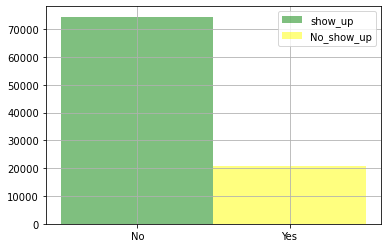

In [109]:
#Histogram plot for patients who showed up and patients who did not show up
df.No_show[show_up].hist(alpha=0.5, bins=1, color='green' ,label='show_up')
df.No_show[No_show_up].hist(alpha=0.5, bins=1, color='yellow', label='No_show_up')
plt.legend();

It appears 74458 patients showed up for their scheduled appointment out of 95152 patients being investigated

### Research Question 1 (Does the day of the week appointment was scheduled for influence  show up?)

In [110]:
#Creating a column for day of the week
df['day_of_week'] = df['AppointmentDay'].dt.dayofweek

In [111]:
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,day_of_week
0,F,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4
1,M,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4
2,F,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4
3,F,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4
4,F,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4


In [112]:
#Finding number of unique days of the week
df.day_of_week.nunique()

6

In [113]:
#Counting the number of patient who showed up or did not show up based on day of the week
Show_day_counts=df.groupby('No_show')['day_of_week'].value_counts(sort=False)
Show_day_counts

No_show  day_of_week
No       0              14904
         1              17563
         2              17614
         3              11789
         4              12558
         5                 30
Yes      0               4311
         1               4807
         2               4744
         3               3115
         4               3707
         5                  9
Name: day_of_week, dtype: int64

In [114]:
#df.AppointmentDay[No_show_up].value_counts()

Text(0, 0.5, 'Number Show up / No show')

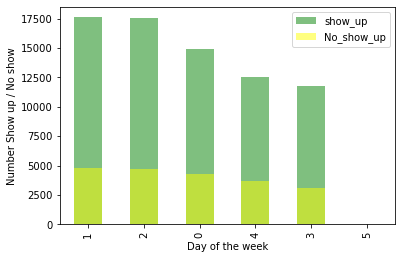

In [115]:
#plot of Day of the week received against Show up
df.day_of_week[show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'green', label='show_up')
df.day_of_week[No_show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'yellow', label='No_show_up')
plt.legend();
plt.xlabel('Day of the week')
plt.ylabel('Number Show up / No show')

From the visualization above, it appears most appointments are scheduled for Tuesday and Wednesday

In [116]:
# get total counts for each No Show
Show_totals = df.groupby('No_show').count()['Age']
Show_totals

No_show
No     74458
Yes    20693
Name: Age, dtype: int64

In [117]:
# get proportions by dividing patients who showed(day of week) counts by total # of No samples in the No Show column
No_day_proportions = Show_day_counts['No'] / Show_totals['No']
No_day_proportions

day_of_week
0    0.200167
1    0.235878
2    0.236563
3    0.158331
4    0.168659
5    0.000403
Name: day_of_week, dtype: float64

In [118]:
# get proportions by dividing patients who did not show(day of week) counts by total # of No samples in the Yes Show column
Yes_day_proportions = Show_day_counts['Yes'] / Show_totals['Yes']
Yes_day_proportions

day_of_week
0    0.208331
1    0.232301
2    0.229256
3    0.150534
4    0.179143
5    0.000435
Name: day_of_week, dtype: float64

In [137]:
#Creating a function the number of location on the x axis for each group
def Num_x_loc(proportions):
    ind = np.arange(len(proportions))
    return ind

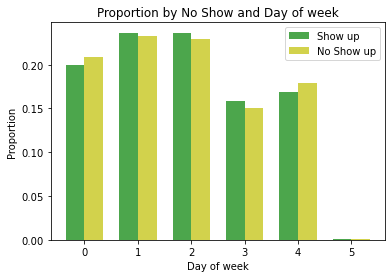

In [138]:
# plot of proportion on bar chart
No_day_bars = plt.bar(Num_x_loc(No_day_proportions), No_day_proportions, width, color='g', alpha=.7, label='Show up')
Yes_day_bars = plt.bar(Num_x_loc(No_day_proportions) + width, Yes_day_proportions, width, color='y', alpha=.7, label='No Show up')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Day of week')
plt.title('Proportion by No Show and Day of week')
locations = Num_x_loc(No_day_proportions) + width / 2  # xtick locations
labels = ['0', '1','2','3','4','5']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

### Conclusion on Day of the week
From analysis, it appears patients are more likely to show up for scheduled appointment on Tuesday , Wednesday and Thursday since the show higher proportion on those days as compared to Monday and Friday. There are less appointments made on Saturday. This may be due to the fact that the facility is do not open or does not take a lot of appointments on weekends.

### Research Question 2 (Does receiving SMS before scheduled appointment affect show up?)

In [125]:
#Sum of patients who showed up irrespective of whether they received SMS or not
df.SMS_received[show_up].value_counts().sum()

74458

In [126]:
#Patients who shown up with or without receiving SMS
df.SMS_received[show_up].value_counts()

0    51059
1    23399
Name: SMS_received, dtype: int64

In [127]:
#Sum of Patients who do not show up with or without receiving SMS
df.SMS_received[No_show_up].value_counts().sum()

20693

In [128]:
#Patients who do not show up with or without receiving SMS
df.SMS_received[No_show_up].value_counts()

0    11341
1     9352
Name: SMS_received, dtype: int64

Text(0, 0.5, 'Number Show up / No show')

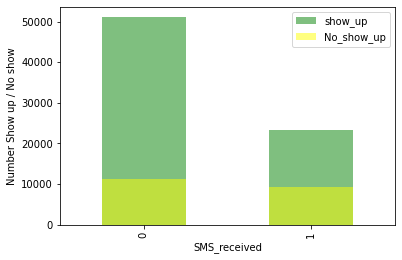

In [129]:
#plot of SMS received of not against Show up and No show up
df.SMS_received[show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'green', label='show_up')
df.SMS_received[No_show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'yellow', label='No_show_up')
plt.legend();
plt.xlabel('SMS_received')
plt.ylabel('Number Show up / No show')

It appears, majority of patients did not receive SMS as a reminder before their appointment. This may be due to the facility not having their contact numbers or the patients not having phones etc.

In [130]:
#Counting No show and sms received
Show_SMS_counts=df.groupby(['No_show','SMS_received']).count()['Age']
Show_SMS_counts

No_show  SMS_received
No       0               51059
         1               23399
Yes      0               11341
         1                9352
Name: Age, dtype: int64

In [131]:
# get proportions by dividing patients who showed(SMS) counts by total # of No samples in the No Show column
No_SMS_proportions = Show_SMS_counts['No'] / Show_totals['No']
No_SMS_proportions

SMS_received
0    0.685742
1    0.314258
Name: Age, dtype: float64

In [132]:
# get proportions by dividing patients who did not show(SMS) counts by total # of No samples in the No Show column
Yes_SMS_proportions = Show_SMS_counts['Yes'] / Show_totals['Yes']
Yes_SMS_proportions

SMS_received
0    0.54806
1    0.45194
Name: Age, dtype: float64

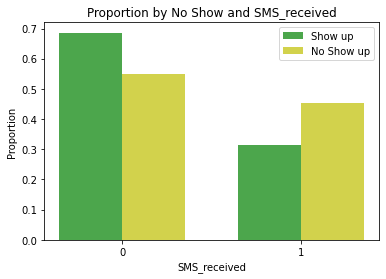

In [139]:
# plot of proportion on bar chart
No_SMS_bars = plt.bar(Num_x_loc(No_SMS_proportions), No_SMS_proportions, width, color='g', alpha=.7, label='Show up')
Yes_SMS_bars = plt.bar(Num_x_loc(No_SMS_proportions) + width, Yes_SMS_proportions, width, color='y', alpha=.7, label='No Show up')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('SMS_received')
plt.title('Proportion by No Show and SMS_received')
locations = Num_x_loc(No_SMS_proportions) + width / 2  # xtick locations
labels = ['0', '1']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

### Conclusion on SMS received
From analysis, it appears patients who show up for their appointment more do not even received an SMS before the scheduled appointment.\
On the other hand, patients who receive SMS before their scheduled appointment show up less. Therefore receiving SMS before appointment does not guarentee show up.


<a id='eda'></a>

### Research Question 3 (Does having a Scholarship affect Show up for appointment?)

In [141]:
#Patients who shown up with or without Scholarship
df.Scholarship[show_up].value_counts()

0    66825
1     7633
Name: Scholarship, dtype: int64

In [142]:
#Patients who did not show up with or without Scholarship
df.Scholarship[No_show_up].value_counts()

0    18246
1     2447
Name: Scholarship, dtype: int64

Text(0, 0.5, 'Number Show up / No show')

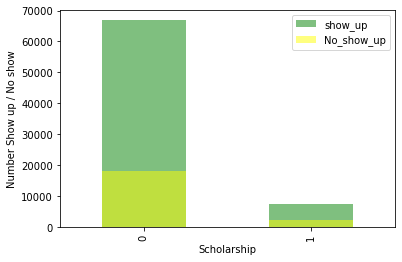

In [143]:
#plot of Scholarship of not against Show up and No show up
df.Scholarship[show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'green', label='show_up')
df.Scholarship[No_show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'yellow', label='No_show_up')
plt.legend();
plt.xlabel('Scholarship')
plt.ylabel('Number Show up / No show')

From the above visualisation, only few patients had scholarships

In [145]:
#Count of No show and Scholarship
Show_Sch_counts=df.groupby('No_show')['Scholarship'].value_counts()
Show_Sch_counts

No_show  Scholarship
No       0              66825
         1               7633
Yes      0              18246
         1               2447
Name: Scholarship, dtype: int64

In [146]:
# get proportions by dividing patients who showed counts by total # of No samples in the No Show column
No_Sch_proportions = Show_Sch_counts['No'] / Show_totals['No']
No_Sch_proportions

Scholarship
0    0.897486
1    0.102514
Name: Scholarship, dtype: float64

In [147]:
# get proportions by dividing patients who did not show counts by total # of No samples in the No Show column
Yes_Sch_proportions = Show_Sch_counts['Yes'] / Show_totals['Yes']
Yes_Sch_proportions

Scholarship
0    0.881747
1    0.118253
Name: Scholarship, dtype: float64

In [616]:
ind = np.arange(len(No_Sch_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

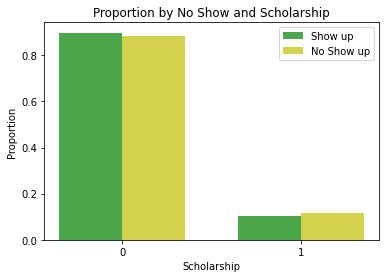

In [148]:
# plot of proportion on bar chart
No_Sch_bars = plt.bar(Num_x_loc(No_Sch_proportions), No_Sch_proportions, width, color='g', alpha=.7, label='Show up')
Yes_Sch_bars = plt.bar(Num_x_loc(No_Sch_proportions) + width, Yes_Sch_proportions, width, color='y', alpha=.7, label='No Show up')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Scholarship')
plt.title('Proportion by No Show and Scholarship')
locations = Num_x_loc(No_Sch_proportions) + width / 2  # xtick locations
labels = ['0', '1']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

### Conclusion on Scholarship
From analysis, it appears that the ratio of patients who show up to patients who do not show up is 0.897486:0.881747 for those who do not have scholarship and is 0.102514:0.118253 for those who have scholarship.
Therefore having a Scholarship or not with the Brasilian welfare program Bolsa Família does not guarantee that you will show up for your scheduled appointment.

### Research Question 4 (Does the Age class of a person influence showing up for appointment?)


In [149]:
#finding the mean age of people who show up or does not show up for their appointment
df.groupby('No_show')['Age'].mean()

No_show
No     38.823699
Yes    34.806843
Name: Age, dtype: float64

Text(0, 0.5, 'Age')

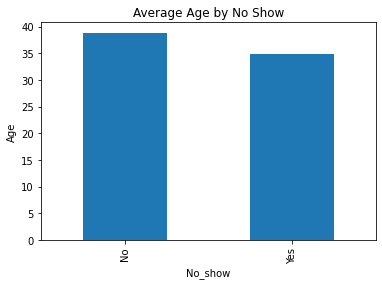

In [150]:
#Plot of average age of people who show up or does not show up for their appointment
df.groupby('No_show')['Age'].mean().plot(kind='bar', title='Average Age by No Show')
plt.xlabel('No_show')
plt.ylabel('Age')

It appears the average age of patients who show up for scheduled appointment is approximately 38 and the average age of patients who does not shows up for scheduled appointment is approximately 34. 

Text(0, 0.5, 'Number Show up / No show')

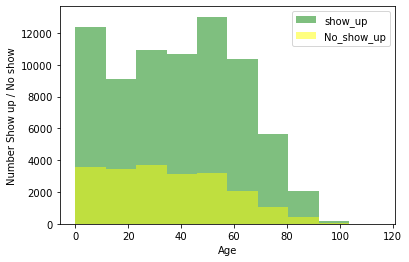

In [151]:
#Histogram plot of Age against Show up or no show up
df.Age[show_up].plot(kind='hist',alpha=0.5, bins=10,color='green', label='show_up')
df.Age[No_show_up].plot(kind='hist',alpha=0.5, bins=10, color='yellow', label='No_show_up')
plt.legend();
plt.xlabel('Age')
plt.ylabel('Number Show up / No show')

In [152]:
#Statistical description of Age to help create bins
df.describe().Age

count    95151.000000
mean        37.950132
std         23.057861
min          0.000000
25%         19.000000
50%         38.000000
75%         56.000000
max        115.000000
Name: Age, dtype: float64

In [153]:
# Create Bin edges to "cut" the age data into groups('Child','Teenage','Adult','Senior Adult')
bin_edges = [ 0,12 ,19 , 59, 115] 
bin_names=['Child','Teenage','Adult','Senior Adult']
df['Age_class']=pd.cut(df['Age'],bin_edges,labels=bin_names)
df.tail()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,day_of_week,Age_class
110520,F,2016-06-07,42,MARIA ORTIZ,0,0,0,0,0,1,No,1,Adult
110521,F,2016-06-07,53,MARIA ORTIZ,0,0,0,0,0,1,No,1,Adult
110523,F,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,1,Adult
110524,F,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,1,Adult
110525,F,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,1,Adult


In [154]:
#getting the count of the age classes in the dataset
df['Age_class'].value_counts()
#df.groupby(['Age_class']).count()

Adult           50978
Senior Adult    19188
Child           14593
Teenage          8045
Name: Age_class, dtype: int64

In [155]:
#Count of No show and age class
df.groupby('No_show')['Age_class'].value_counts(sort=False)

No_show              
No       Child           11270
         Teenage          5832
         Adult           39440
         Senior Adult    16095
Yes      Child            3323
         Teenage          2213
         Adult           11538
         Senior Adult     3093
Name: Age_class, dtype: int64

In [156]:
Show_Age_counts=df.groupby(['No_show','Age_class']).count()['Age']
Show_Age_counts

No_show  Age_class   
No       Child           11270
         Teenage          5832
         Adult           39440
         Senior Adult    16095
Yes      Child            3323
         Teenage          2213
         Adult           11538
         Senior Adult     3093
Name: Age, dtype: int64

Text(0, 0.5, 'Number Show up / No show')

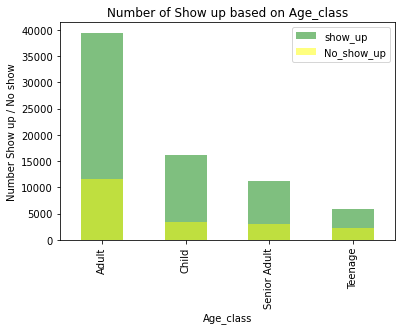

In [157]:
#Plot of Age class against show up
df.Age_class[show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'green', label='show_up', title='Number of Show up based on Age_class')
df.Age_class[No_show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'yellow', label='No_show_up')
plt.legend();
plt.xlabel('Age_class')
plt.ylabel('Number Show up / No show')

The are more adults patients than other age group considering the visualisation above. 

In [158]:
# get total counts for each No Show
Show_totals = df.groupby('No_show').count()['Age']
Show_totals

No_show
No     74458
Yes    20693
Name: Age, dtype: int64

In [159]:
# get proportions by dividing patients who showed counts by total # of No samples in the No Show column
No_Age_proportions = Show_Age_counts['No'] / Show_totals['No']
No_Age_proportions

Age_class
Child           0.151360
Teenage         0.078326
Adult           0.529695
Senior Adult    0.216162
Name: Age, dtype: float64

In [160]:
# get proportions by dividing patients who did not show counts by total # of No samples in the No Show column
Yes_Age_proportions = Show_Age_counts['Yes'] / Show_totals['Yes']
Yes_Age_proportions

Age_class
Child           0.160586
Teenage         0.106944
Adult           0.557580
Senior Adult    0.149471
Name: Age, dtype: float64

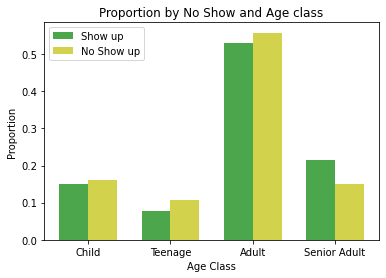

In [161]:
# plot of proportion on bar chart
No_Age_bars = plt.bar(Num_x_loc(No_Age_proportions), No_Age_proportions, width, color='g', alpha=.7, label='Show up')
Yes_Age_bars = plt.bar(Num_x_loc(No_Age_proportions) + width, Yes_Age_proportions, width, color='y', alpha=.7, label='No Show up')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Age Class')
plt.title('Proportion by No Show and Age class')
locations = Num_x_loc(No_Age_proportions) + width / 2  # xtick locations
labels = ['Child', 'Teenage', 'Adult', 'Senior Adult']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

### Conclusion on Age
In my analysis, given the ratio of showing up and not showing up for appointment for a Senior Adult, it appears Senior Adults are more likely to show up for scheduled appointment. Teenage and Adult patients are less likely to show up for a scheduled appointment. Children, on the other hand are almost just as likely to show up as they are unlikely to show up for a scheduled appointment.

### Research Question 5 (Does the Gender of a person influence Showing up for appointment?)

In [162]:
#Count of each gender
df.Gender.value_counts()


F    61810
M    33341
Name: Gender, dtype: int64

In [163]:
#COunt of Gender based on No Show
df.groupby('Gender')['No_show'].value_counts()

Gender  No_show
F       No         48243
        Yes        13567
M       No         26215
        Yes         7126
Name: No_show, dtype: int64

Text(0, 0.5, 'Number Show up / No show')

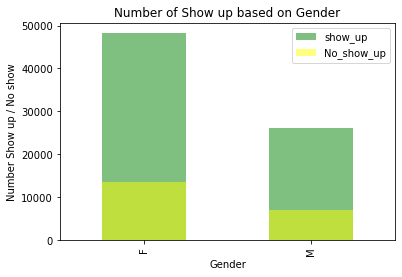

In [164]:
#plot of Number of Show up or No show up against Gender
df.Gender[show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'green', label='show_up', title='Number of Show up based on Gender')
df.Gender[No_show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'yellow', label='No_show_up')
plt.legend();
plt.xlabel('Gender')
plt.ylabel('Number Show up / No show')

Clearly, there are more female than the male gender showing up or not showing up for appointments

In [165]:
#Counting No Show and gender
ShowGen_counts=df.groupby(['No_show','Gender']).count()['Age']
ShowGen_counts

No_show  Gender
No       F         48243
         M         26215
Yes      F         13567
         M          7126
Name: Age, dtype: int64

In [166]:
# get total counts for each No Show
Show_totals = df.groupby('No_show').count()['Age']
Show_totals

No_show
No     74458
Yes    20693
Name: Age, dtype: int64

In [167]:
# get proportions by dividing patients who showed counts by total # of No samples in the No Show column
No_Gen_proportions = ShowGen_counts['No'] / Show_totals['No']
No_Gen_proportions

Gender
F    0.647922
M    0.352078
Name: Age, dtype: float64

In [168]:
# get proportions by dividing patients who did not show counts by total # of No samples in the No Show column
Yes_Gen_proportions = ShowGen_counts['Yes'] / Show_totals['Yes']
Yes_Gen_proportions

Gender
F    0.655632
M    0.344368
Name: Age, dtype: float64

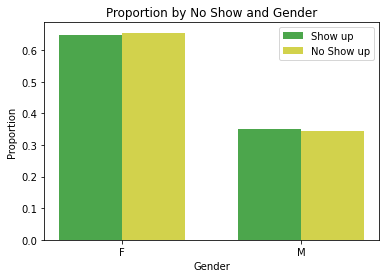

In [169]:
# plot of proportion on bar chart
No_Gen_bars = plt.bar(Num_x_loc(No_Gen_proportions), No_Gen_proportions, width, color='g', alpha=.7, label='Show up')
Yes_Gen_bars = plt.bar(Num_x_loc(No_Gen_proportions) + width, Yes_Gen_proportions, width, color='y', alpha=.7, label='No Show up')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.title('Proportion by No Show and Gender')
locations = Num_x_loc(No_Gen_proportions) + width / 2  # xtick locations
labels = ['F', 'M']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

### Conclusion on Gender
Considering the above visualization, gender is not a strong variable to determine if a patient will show up for an appointment or not since the proportion of both male and female for showing up for appointment is almost 50:50.

### Research Question 6 (Does the Neigbourhood a person lives in influence Showing up for appointment?)

In [170]:
#number of unique neighbourhood
df.Neighbourhood.nunique()

81

In [171]:
#Count of patients who showed up or does not show up based on Neighbourhood
df.groupby('Neighbourhood').count()['No_show']

Neighbourhood
AEROPORTO                 8
ANDORINHAS             1971
ANTÔNIO HONÓRIO         254
ARIOVALDO FAVALESSA     269
BARRO VERMELHO          392
                       ... 
SÃO JOSÉ               1712
SÃO PEDRO              2162
TABUAZEIRO             2784
UNIVERSITÁRIO           149
VILA RUBIM              809
Name: No_show, Length: 81, dtype: int64

In [172]:
#Count of patients who does not show up based on Neighbourhood
df.Neighbourhood[show_up].value_counts()

JARDIM CAMBURI       4007
MARIA ORTIZ          3171
RESISTÊNCIA          2736
JARDIM DA PENHA      2592
TABUAZEIRO           2238
                     ... 
PONTAL DE CAMBURI      51
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64

In [173]:
#Count of patients who does not show up based on Neighbourhood
df.Neighbourhood[No_show_up].value_counts()

JARDIM CAMBURI                 1247
MARIA ORTIZ                    1052
ITARARÉ                         845
RESISTÊNCIA                     821
JESUS DE NAZARETH               641
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO FRADE                     2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

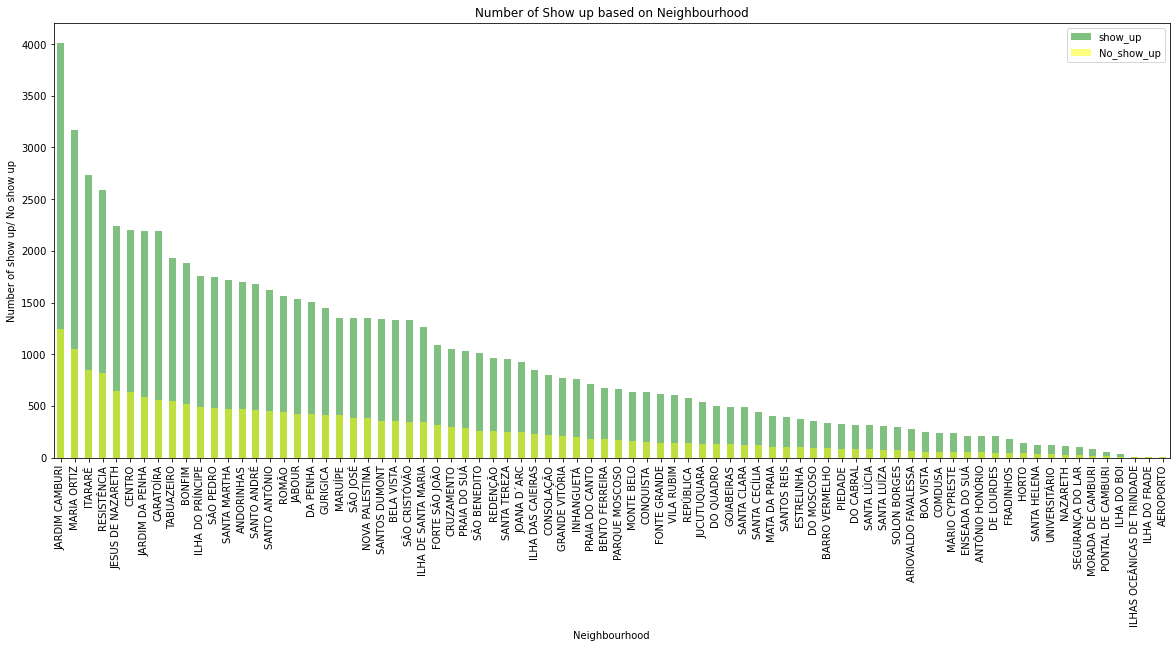

In [174]:
#Bar chart of Show up/No show up based on Neigbourhood count
plt.figure(figsize=(20,8))
df.Neighbourhood[show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'green', label='show_up',title='Number of Show up based on Neighbourhood')
df.Neighbourhood[No_show_up].value_counts().plot(kind='bar',alpha=0.5, color= 'yellow', label='No_show_up')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of show up/ No show up')
plt.legend();

The bar chart represents the neighbourhood that has the most patients scheduling appointment. Each bar consist of number patients who showed up and patients who did not show up based on the neighbourhood they live in. 

In [175]:
#Counting No Show and Neighbourhood
ShowNei_counts=df.groupby(['No_show','Neighbourhood']).count()['Age']
ShowNei_counts

No_show  Neighbourhood      
No       AEROPORTO                 7
         ANDORINHAS             1505
         ANTÔNIO HONÓRIO         205
         ARIOVALDO FAVALESSA     209
         BARRO VERMELHO          304
                                ... 
Yes      SÃO JOSÉ                384
         SÃO PEDRO               479
         TABUAZEIRO              546
         UNIVERSITÁRIO            32
         VILA RUBIM              139
Name: Age, Length: 160, dtype: int64

In [176]:
# get total counts for each No Show
Show_totals = df.groupby('No_show').count()['Age']
Show_totals

No_show
No     74458
Yes    20693
Name: Age, dtype: int64

In [177]:
# get proportions by dividing patients who showed counts by total # of No samples in the No Show column
No_proportions = ShowNei_counts['No'] / Show_totals['No']
No_proportions

Neighbourhood
AEROPORTO              0.000094
ANDORINHAS             0.020213
ANTÔNIO HONÓRIO        0.002753
ARIOVALDO FAVALESSA    0.002807
BARRO VERMELHO         0.004083
                         ...   
SÃO JOSÉ               0.017836
SÃO PEDRO              0.022603
TABUAZEIRO             0.030057
UNIVERSITÁRIO          0.001571
VILA RUBIM             0.008998
Name: Age, Length: 80, dtype: float64

In [178]:
# get proportions by dividing patients who did not show counts by total # of No samples in the No Show column
Yes_proportions = ShowNei_counts['Yes'] / Show_totals['Yes']
Yes_proportions

Neighbourhood
AEROPORTO              0.000048
ANDORINHAS             0.022520
ANTÔNIO HONÓRIO        0.002368
ARIOVALDO FAVALESSA    0.002900
BARRO VERMELHO         0.004253
                         ...   
SÃO JOSÉ               0.018557
SÃO PEDRO              0.023148
TABUAZEIRO             0.026386
UNIVERSITÁRIO          0.001546
VILA RUBIM             0.006717
Name: Age, Length: 80, dtype: float64

In [179]:
#Get the name of neigbourhood that show or did not show up
A=df.Neighbourhood[show_up].unique()
print(sorted(A))
#A


['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBLICA', 'RESISTÊNCIA', 'ROMÃO', 'SANTA CECÍLIA', 'SANTA CLARA', 'SANTA HELENA', 'SANTA LUÍZA', 'SANTA LÚCIA', 'SANTA 

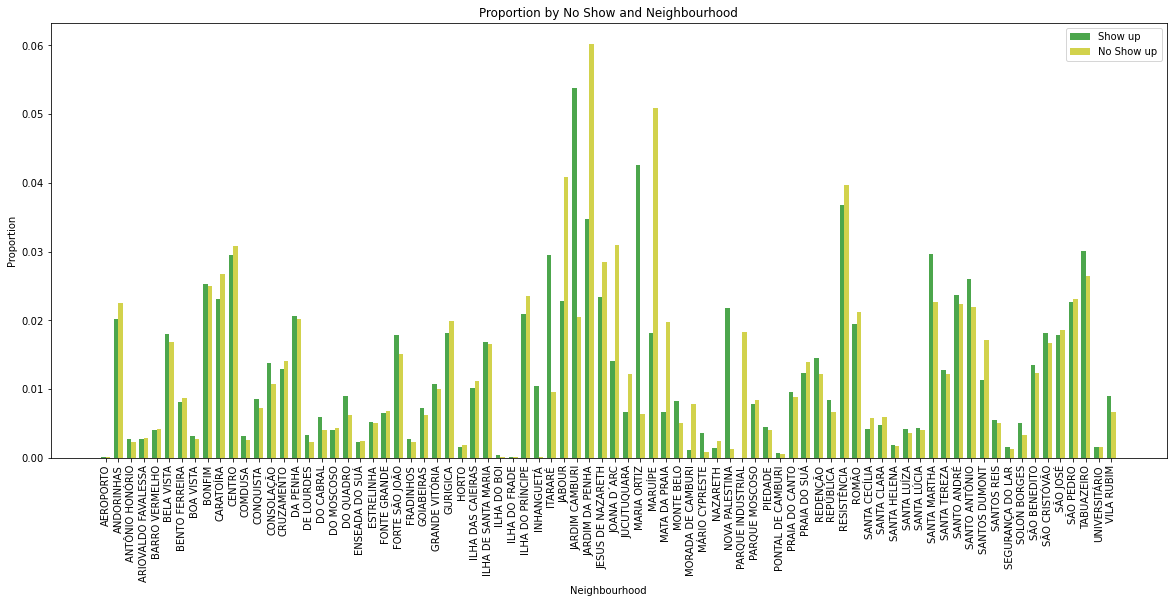

In [180]:
# plot of proportion on bar chart
plt.figure(figsize=(20,8))
No_bars = plt.bar(Num_x_loc(No_proportions), No_proportions, width, color='g', alpha=.7, label='Show up')
Yes_bars = plt.bar(Num_x_loc(No_proportions) + width, Yes_proportions, width, color='y', alpha=.7, label='No Show up')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Neighbourhood')
plt.title('Proportion by No Show and Neighbourhood')
locations = Num_x_loc(No_proportions) + width / 2  # xtick locations
labels = ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'JARDIM CAMBURI', 'JARDIM DA PENHA', 'JESUS DE NAZARETH', 'JOANA D´ARC', 'JUCUTUQUARA', 'MARIA ORTIZ', 'MARUÍPE', 'MATA DA PRAIA', 'MONTE BELO', 'MORADA DE CAMBURI', 'MÁRIO CYPRESTE', 'NAZARETH', 'NOVA PALESTINA', 'PARQUE INDUSTRIAL', 'PARQUE MOSCOSO', 'PIEDADE', 'PONTAL DE CAMBURI', 'PRAIA DO CANTO', 'PRAIA DO SUÁ', 'REDENÇÃO', 'REPÚBLICA', 'RESISTÊNCIA', 'ROMÃO', 'SANTA CECÍLIA', 'SANTA CLARA', 'SANTA HELENA', 'SANTA LUÍZA', 'SANTA LÚCIA', 'SANTA MARTHA', 'SANTA TEREZA', 'SANTO ANDRÉ', 'SANTO ANTÔNIO', 'SANTOS DUMONT', 'SANTOS REIS', 'SEGURANÇA DO LAR', 'SOLON BORGES', 'SÃO BENEDITO', 'SÃO CRISTÓVÃO', 'SÃO JOSÉ', 'SÃO PEDRO', 'TABUAZEIRO', 'UNIVERSITÁRIO', 'VILA RUBIM']
plt.xticks(locations, labels,rotation=90)

# legend
plt.legend()

### Conclusion on Neighbourhood
Given the visualization, From observation, it appears patients from JARDIM CAMBURI and MARIA ORTIZ neighbourhood happen to show up more for appointments as compared to patients from MARUÍPE. Therefore, the Neigbourhood a patients lives in greatly affects whether or not a patients shows up for a scheduled appointment since the location of the closer the facility is to a neigbourhood, the more probable it is for a patient to show up. Transportation availability and cost of transportation from a patients neighbourhood to the facility is another factor which may affect show up for appointment.

### RELATIONSHIP BETWEEN VARIABLES

### Research Question 7 (Does the gender and age class of a patient affect show up?)

In [186]:
#Count of No show, Gender and Age class
Show_GA_counts=df.groupby(['No_show','Gender','Age_class']).count()['Age']
Show_GA_counts

No_show  Gender  Age_class   
No       F       Child            5411
                 Teenage          3743
                 Adult           27478
                 Senior Adult    10725
         M       Child            5859
                 Teenage          2089
                 Adult           11962
                 Senior Adult     5370
Yes      F       Child            1588
                 Teenage          1425
                 Adult            8153
                 Senior Adult     2135
         M       Child            1735
                 Teenage           788
                 Adult            3385
                 Senior Adult      958
Name: Age, dtype: int64

In [187]:
# get proportions by dividing each gender and age class patients who showed counts by total # of No samples in the No Show column
No_GA_proportions = Show_GA_counts['No'] / Show_totals['No']
No_GA_proportions

Gender  Age_class   
F       Child           0.072672
        Teenage         0.050270
        Adult           0.369040
        Senior Adult    0.144041
M       Child           0.078689
        Teenage         0.028056
        Adult           0.160654
        Senior Adult    0.072121
Name: Age, dtype: float64

In [188]:
# get proportions by dividing each gender and age class patients who did not show counts by total # of No samples in the No Show column
Yes_GA_proportions = Show_GA_counts['Yes'] / Show_totals['Yes']
Yes_GA_proportions

Gender  Age_class   
F       Child           0.076741
        Teenage         0.068864
        Adult           0.393998
        Senior Adult    0.103175
M       Child           0.083845
        Teenage         0.038081
        Adult           0.163582
        Senior Adult    0.046296
Name: Age, dtype: float64

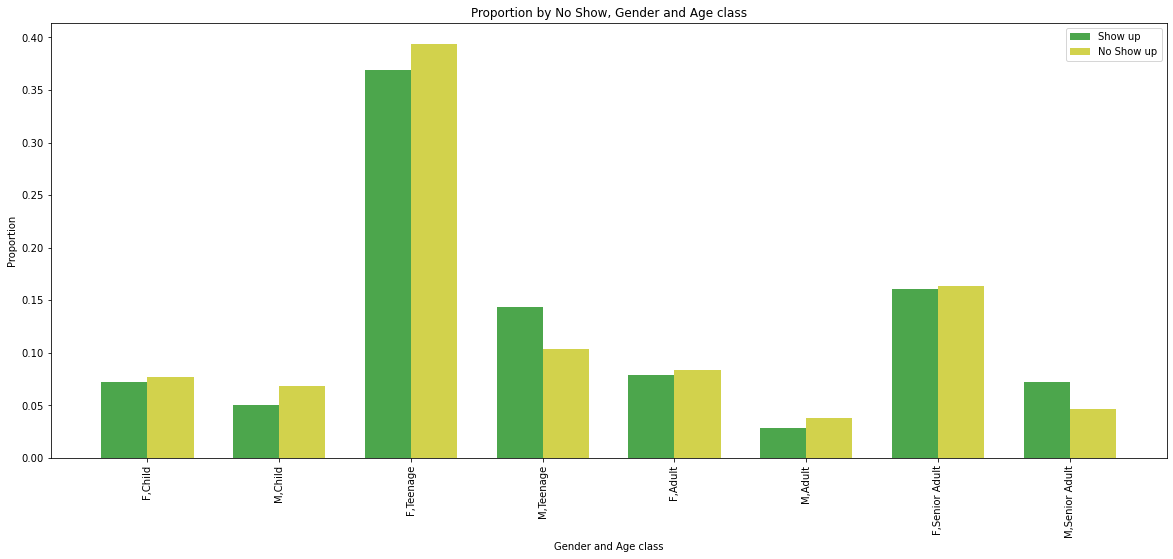

In [190]:
# plot of proportion on bar chart
plt.figure(figsize=(20,8))
No_GA_bars = plt.bar(Num_x_loc(No_GA_proportions), No_GA_proportions, width, color='g', alpha=.7, label='Show up')
Yes_GA_bars = plt.bar(Num_x_loc(No_GA_proportions) + width, Yes_GA_proportions, width, color='y', alpha=.7, label='No Show up')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Gender and Age class')
plt.title('Proportion by No Show, Gender and Age class')
locations = Num_x_loc(No_GA_proportions) + width / 2  # xtick locations
labels = ['F,Child', 'M,Child' ,'F,Teenage','M,Teenage', 'F,Adult', 'M,Adult','F,Senior Adult','M,Senior Adult']
plt.xticks(locations, labels,rotation=90)

# legend
plt.legend()

The above visualisation proves that, male teenagers and male Senior adults have higher proportion of showing up for appointment.

<a id='conclusions'></a>
## Conclusions


In Conclusion, out of 95152 patients that were being investigated, 74458 showed up for their scheduled medical appointment. The remaining 20693 patients did not show. In my quest to find out if the day of the week the appointment was scheduled affect show up, I found out that most appointments are scheduled on Tuesdays and Wednesdays with Saturday recording the lowest appointment made. It appears Tuesday, Wednesday and Thursday have a higher proportion for show up against not showing up for appointment. Therefore patients are more likely to show up for scheduled medical appointment on these days than any other days.
During my analysis, I was curious to know if receiving SMS notification reminders before your scheduled appointment would increase showing up relatively. In my findings, I noticed that, majority of patients who did not receiving SMS notification reminders show up to their scheduled appointments as compared to those who received SMS notification reminders. Given the proportion of show up or no show up for patients who recieved SMS notification reminders, it implies that receiving SMS notification reminders before appointment does not gaurantee showing up.
Being on Brasilian welfare program Bolsa Família Scholarship is another feature which could influence if a patient shows up for a scheduled appointment. Even though majority of the patients are without Scholarship but idealy, one would think having a Scholarship would imply patients showing up for appointments since it would be free. That is not the case for those who have scholarships.
The age bracket of a patient could affect showing up for a scheduled appointment so I decided to dive into finding out which age group shows up more for appointments. In my analysis, given the ratio of showing up and not showing up for appointment for a Senior Adult, it appears Senior Adults are more likely to show up for scheduled appointment. Teenage and Adult patients are less likely to show up for a scheduled appointment.
Considering gender as an independent variable, more of female scheduled appointment than male but the proportion of a male showing up is slightly higher than not showing up as compared to the proportion of a female showing up is slightly lower than not showing up. In my opinion and based on this analysis, gender is not a strong variable to determine if a patient will show up for an appointment or not.
Majority of patients who schedules an appointment lives in JARDIM CAMBURI and the least number of patients live in AEROPORTO. The Neighbourhood a patient lives in greatly affects whether or not a patients shows up for a scheduled appointment since the location of the closer the facility is to a neigbourhood, the more probable it is for a patient to show up.Transportation availability and cost of transportation from a patients neighbourhood to the facility is another factor which may affect show up for appointment. That been said, it appears patients from JARDIM CAMBURI and MARIA ORTIZ neighbourhood happen to show up more for appointments as compared to patients from MARUÍPE.
Looking at two independent variables gender and age class, I noticed male teenagers and male Senior adults are more probable to showing up for appointment whereas female teenagers and male child are more like not to show up.
Therefore these are some of main variables to determine whether or not a patient will show up for appointment.


### Limitations
There was one limitation to my analysis design which may affect the prediction made. To make such a prediction especially based on the features provided, we need a larger dataset. Therefore, I need a larger dataset to make a concise prediction of whether or not a patient will show up appointment.